# Analysis of Antibiotics Prescription and Hospitalisation Risk

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import os
import glob
import gzip
%matplotlib inline

In [126]:
#os.chdir("..")
#current_working_dir = os.getcwd()
#print(current_working_dir)
#data = pd.read_csv(r'output/measures/measure_STARPU_antibiotics.csv')
#data

In [127]:
#data = pd.read_csv("C:/Users/m84300af/OneDrive - The University of Manchester/Documents/GitHub/amr-uom-brit/output/measures/input_2019-01-01.csv.gz")
#data

In [4]:
os.chdir("..")
current_working_dir = os.getcwd()
print(current_working_dir)

c:\Users\m84300af\OneDrive - The University of Manchester\Documents\GitHub\amr-uom-brit


In [143]:
data = pd.read_csv(r'output/measures/measure_antibiotics_overall_2019-01-01.csv')
data

,practice,sex,antibacterial_prescriptions,population,value
0,10,F,0.0,2.0,0.0
1,10,M,4.0,1.0,4.0
2,11,F,3.0,1.0,3.0
3,11,M,0.0,2.0,0.0
4,12,F,2.0,2.0,1.0
...,...,...,...,...,...
57,39,M,2.0,1.0,2.0
58,40,F,NaN,NaN,NaN
59,40,M,0.0,1.0,0.0
60,7,F,4.0,1.0,4.0


In [6]:
#read csv.gz files and concatenate them
#path2 = os.getcwd()+'\output\measures'
##path1 = r'C:\Users\m84300af\OneDrive - The University of Manchester\Documents\GitHub\amr-uom-brit\output\measures'
##all_files = glob.glob(os.path.join(path1, "*.csv.gz"))
##print(path1)

##data = pd.concat((pd.read_csv(f) for f in all_files))
##data

In [129]:
data.columns

Index(['bmi_date_measured', 'smoking_status_date',
       'most_recent_unclear_smoking_cat_date', 'flu_vaccine_med',
       'flu_vaccine_clinical', 'sgss_positive', 'covrx1_dat', 'covrx2_dat',
       'died_date', 'uti_date_1', 'uti_date_2', 'uti_date_3', 'uti_date_4',
       'lrti_date_1', 'lrti_date_2', 'lrti_date_3', 'lrti_date_4', 'age',
       'age_cat', 'sex', 'practice', 'region', 'msoa', 'imd', 'bmi',
       'ethnicity', 'smoking_status', 'gp_count', 'flu_vaccine_tpp',
       'flu_vaccine', 'antibacterial_prescriptions',
       'broad_spectrum_antibiotics_prescriptions', 'primary_care_covid',
       'admitted', 'uti_counts', 'lrti_counts', 'uti_ab_count_1',
       'uti_ab_count_2', 'uti_ab_count_3', 'uti_ab_count_4', 'lrti_ab_count_1',
       'lrti_ab_count_2', 'lrti_ab_count_3', 'lrti_ab_count_4', 'patient_id'],
      dtype='object')

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   bmi_date_measured                         950 non-null    object 
 1   smoking_status_date                       100 non-null    object 
 2   most_recent_unclear_smoking_cat_date      100 non-null    object 
 3   flu_vaccine_med                           100 non-null    object 
 4   flu_vaccine_clinical                      100 non-null    object 
 5   sgss_positive                             100 non-null    object 
 6   covrx1_dat                                0 non-null      float64
 7   covrx2_dat                                0 non-null      float64
 8   died_date                                 100 non-null    object 
 9   uti_date_1                                100 non-null    object 
 10  uti_date_2                           

In [131]:
data.describe(include='all')

,bmi_date_measured,smoking_status_date,most_recent_unclear_smoking_cat_date,flu_vaccine_med,flu_vaccine_clinical,sgss_positive,covrx1_dat,covrx2_dat,died_date,uti_date_1,...,lrti_counts,uti_ab_count_1,uti_ab_count_2,uti_ab_count_3,uti_ab_count_4,lrti_ab_count_1,lrti_ab_count_2,lrti_ab_count_3,lrti_ab_count_4,patient_id
count,950,100,100,100,100,100,0.0,0.0,100,100,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000
unique,34,31,31,12,7,95,NaN,NaN,78,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-03,2020-07,2020-07,2018-01,2018-09,2021-02-19,NaN,NaN,2021-09-28,2019-07-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,37,8,7,13,19,3,NaN,NaN,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.892000,0.907000,0.91300,0.907000,0.907000,0.92500,0.892000,0.88000,0.906000,5012.527000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.843294,1.871859,1.88865,1.884649,1.871859,1.91129,1.844923,1.82618,1.871541,2939.457323
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,4.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,2489.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,5092.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,7543.750000


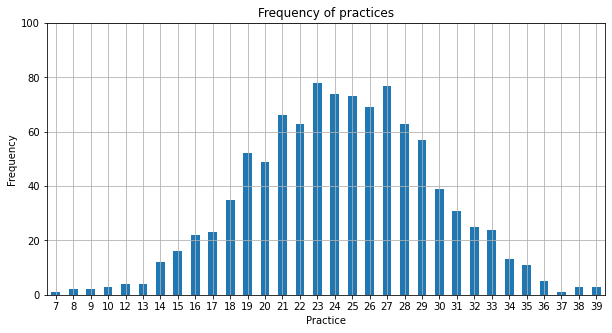

F    511
M    489
Name: sex, dtype: int64


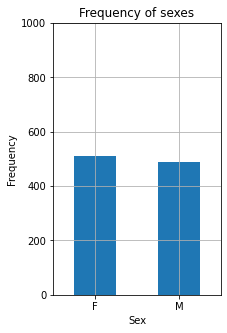

0-4      113
15-24    125
25-34    107
35-44    105
45-54    117
5-14      97
55-64    111
65-74    116
75+      109
Name: age_cat, dtype: int64


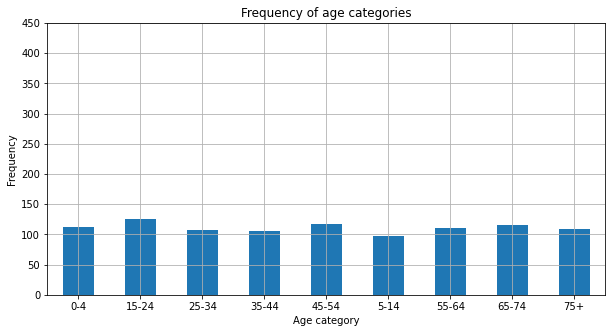

C:\Users\m84300af\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


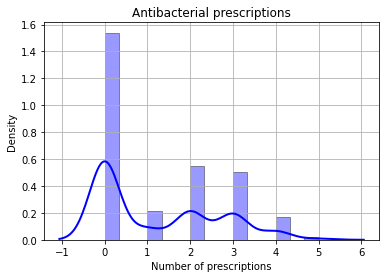

Index(['bmi_date_measured', 'smoking_status_date',
       'most_recent_unclear_smoking_cat_date', 'flu_vaccine_med',
       'flu_vaccine_clinical', 'sgss_positive', 'covrx1_dat', 'covrx2_dat',
       'died_date', 'uti_date_1', 'uti_date_2', 'uti_date_3', 'uti_date_4',
       'lrti_date_1', 'lrti_date_2', 'lrti_date_3', 'lrti_date_4', 'age',
       'age_cat', 'sex', 'practice', 'region', 'msoa', 'imd', 'bmi',
       'ethnicity', 'smoking_status', 'gp_count', 'flu_vaccine_tpp',
       'flu_vaccine', 'antibacterial_prescriptions',
       'broad_spectrum_antibiotics_prescriptions', 'primary_care_covid',
       'admitted', 'uti_counts', 'lrti_counts', 'uti_ab_count_1',
       'uti_ab_count_2', 'uti_ab_count_3', 'uti_ab_count_4', 'lrti_ab_count_1',
       'lrti_ab_count_2', 'lrti_ab_count_3', 'lrti_ab_count_4', 'patient_id'],
      dtype='object')

 0     415
 4      85
 7      76
 5      72
 6      66
 8      54
 3      47
 9      45
 2      43
 10     29
 1      25
 11     23
 13      7
 12      6
-1       3
 14      1
 16      1
-2       1
 15      1
Name: gp_count, dtype: int64

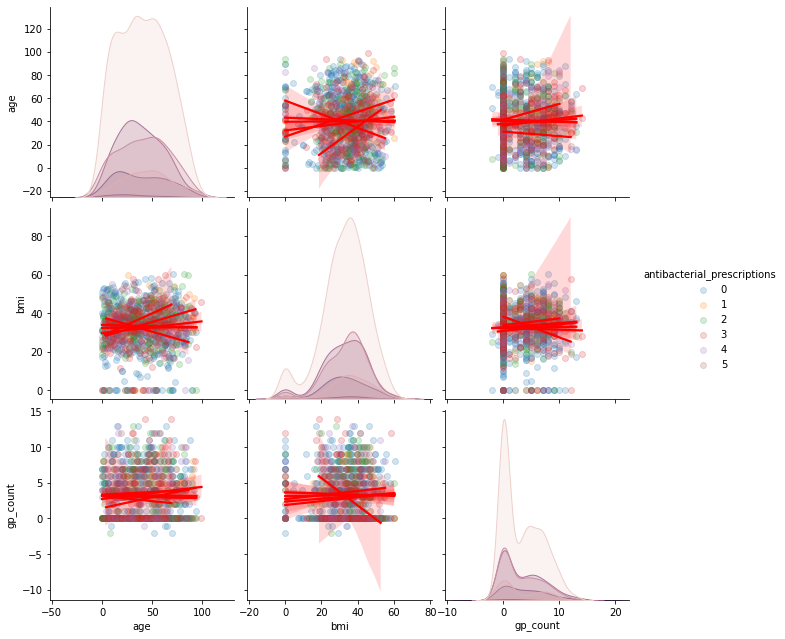

(0.0, 20.0)

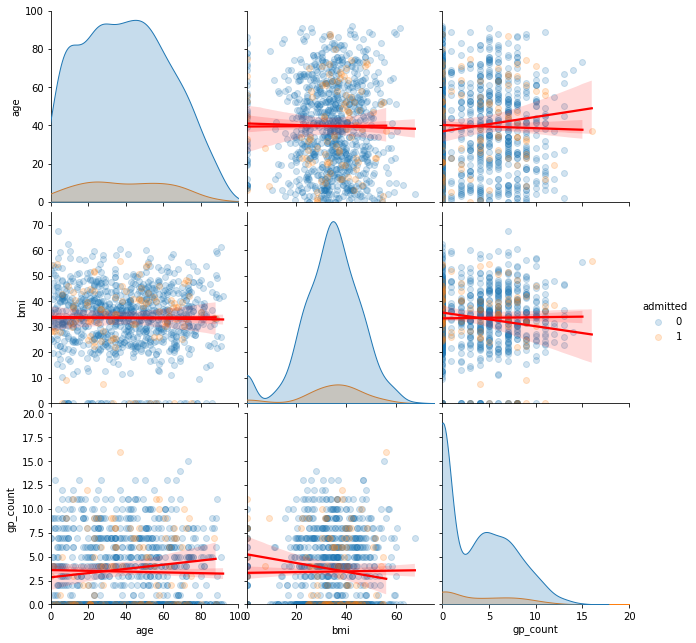